<a href="https://colab.research.google.com/github/jklbiz/sector-cycle-portfolio-strategy/blob/main/lstm_10%EA%B0%9C_%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload=files.upload()

Saving 데이터5.xlsx to 데이터5.xlsx


In [ ]:
from google.colab import files
upload=files.upload()

Saving etf 10개 순위  3주.csv to etf 10개 순위  3주.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from keras import models
from keras import layers

In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras import models
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout, Flatten, Conv2D, pooling

In [4]:
df=pd.read_excel('데이터5.xlsx')

df_date=df.set_index('Symbol Name')

df_reset = df.drop(['Symbol Name'], axis = 1)

In [5]:
energy=df['en_num'].values
industrial = df['in_num'].values
luxury = df['lux_num'].values
essential = df['es_num'].values
health = df['he_num'].values
finance = df['fi_num'].values
it = df['it_num'].values
utility = df['ut_num'].values
transport = df['tr_num'].values
construct = df['co_num'].values

In [6]:
energy=energy[3:]
industrial=industrial[3:]
luxury=luxury[3:]
essential=essential[3:]
health=health[3:]
finance=finance[3:]
it=it[3:]
utility=utility[3:]
transport=transport[3:]
construct=construct[3:]

In [7]:

df_late1=df_reset.loc[:1085,:]
df_late2=df_reset.loc[1:1086,:]
df_late3=df_reset.loc[2:1087,:]

np_late1=df_late1.values
np_late2=df_late2.values
np_late3=df_late3.values

df_late11=pd.DataFrame(np_late1,columns=['en_num1',	'in_num1',	'lux_num1',	'es_num1',	'he_num1',	'fi_num1','it_num1'	,'ut_num1'	,'tr_num1'	,'co_num1'])
df_late22=pd.DataFrame(np_late2,columns=['en_num2',	'in_num2',	'lux_num2',	'es_num2',	'he_num2',	'fi_num2','it_num2'	,'ut_num2'	,'tr_num2'	,'co_num2'])
df_late33=pd.DataFrame(np_late3,columns=['en_num3',	'in_num3',	'lux_num3',	'es_num3',	'he_num3',	'fi_num3','it_num3'	,'ut_num3'	,'tr_num3'	,'co_num3'])

df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)


In [ ]:
df_late['energy']=energy

In [ ]:
df_late

In [10]:
from google.colab import files
upload=files.upload()

Saving etf 10개 순위  3주.csv to etf 10개 순위  3주.csv


In [11]:
df_10=pd.read_csv('etf 10개 순위  3주.csv')

In [12]:
df_10_date=df_10.set_index('날짜')

df_10_reset = df_10.drop(['날짜'], axis = 1)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


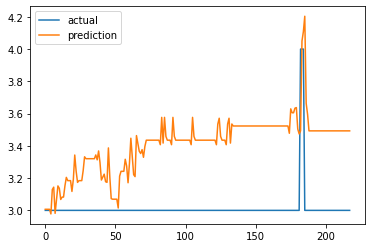

In [13]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['energy']=energy
y_energy_df = df_late['energy']
X_energy_df= df_late.drop('energy',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_energy_df, y_energy_df, shuffle=False, test_size=0.2, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)


In [14]:
accuracy

0.7293577981651376

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


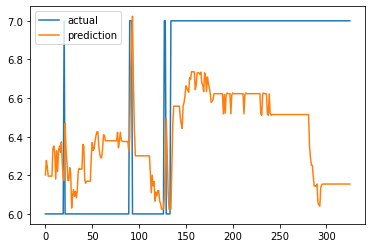

0.8282208588957055

In [15]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['indusrtial']=industrial
y_df = df_late['indusrtial']
X_df= df_late.drop('indusrtial',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)
accuracy

In [ ]:
accuracy

0.8466257668711656

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


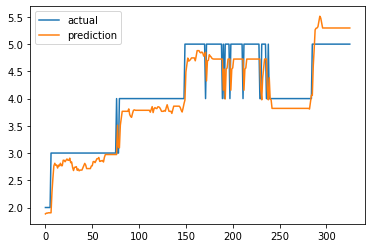

In [16]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['luxury']=luxury
y_df = df_late['luxury']
X_df= df_late.drop('luxury',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)

In [ ]:
accuracy

0.9355828220858896

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


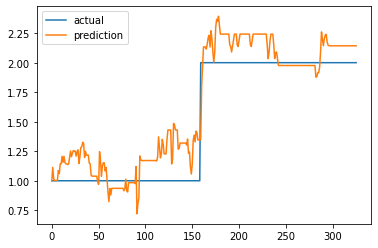

In [17]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['essential']=essential
y_df = df_late['essential']
X_df= df_late.drop('essential',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)

In [ ]:
accuracy

0.9969325153374233

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


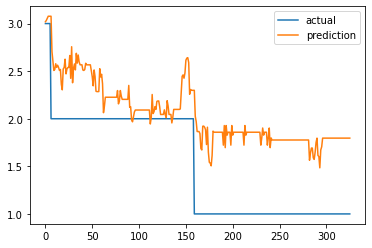

In [18]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['health']=health
y_df = df_late['health']
X_df= df_late.drop('health',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)

In [21]:
accuracy

0.48466257668711654

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


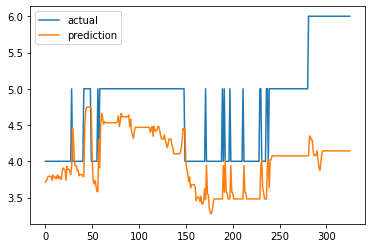

In [25]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['finance']=finance
y_df = df_late['finance']
X_df= df_late.drop('finance',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)

In [24]:
accuracy

0.26380368098159507

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


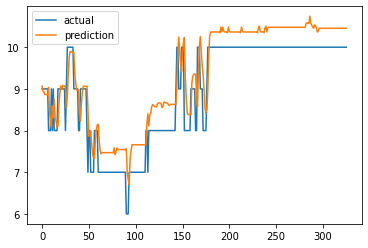

In [26]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['utility']=utility
y_df = df_late['utility']
X_df= df_late.drop('utility',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)

In [27]:
accuracy

0.6656441717791411

In [ ]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['it']=it
y_df = df_late['it']
X_df= df_late.drop('it',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)

In [ ]:
accuracy

0.7883435582822086

In [ ]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['transport']=transport
y_df = df_late['transport']
X_df= df_late.drop('transport',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)

In [ ]:
accuracy

0.4754601226993865

In [ ]:
df_late=pd.concat([df_late11,df_late22,df_late33],axis=1)
df_late['construct']=construct
y_df = df_late['construct']
X_df= df_late.drop('construct',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3, random_state=0)

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = X_train.reshape(-1, 3, 10)
X_test  = X_test.reshape(-1, 3, 10)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
model = Sequential()
model.add(LSTM(30, input_shape=(3,10), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose = 10, validation_data=(X_test, y_test))   
pred = model.predict(X_test)
y_test = y_test.reshape(-1,1)
plt.plot(y_test, label ='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

import math
pred = np.around(pred)
accuracy = accuracy_score(y_test , pred)

In [ ]:
accuracy

0.7975460122699386